In [1]:
!pip install transformers==3.0.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.4/97.4 kB 2.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 769.0/769.0 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 37.5 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × Building wheel for tokenizers (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tokenizers
Failed to build tokenizers
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (tokenizers)


In [2]:

import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn import metrics
import transformers
import torch
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
from transformers import DistilBertTokenizer, DistilBertModel
import logging
logging.basicConfig(level=logging.ERROR)

In [ ]:
from torch import cuda
device ='cuda' if cuda.is_available() else 'cpu'

In [ ]:
def HammingScore(y_true,y_pred,Normalize=True,Sample_Weight=None):
  acc_list=[]
  for i in range(y_true.shape(0)):
    set_true=len(np.where(y_true[i])[0])
    set_pred=len(np.where(y_pred[i])[0])
    tmp=None
    if len(set_true)==0 and len(set_pred)==0:
      tmp=1
    else:
      tmp=len(set_true.union(set_pred))/float(len(set_true.intersection(set_pred)))
    acc_list.append(tmp)
    return np.mean(acc_list)


In [ ]:
data =pd.read_csv('train.csv')
new_df= pd.DataFrame

train_size=0.8
train_data=new_df.sample(frac=train_size, random=200)
test_data=new_df.drop(train_data.index).reset_index(Drop=True)
train_data=train_data.reset_index(Drop=True)

print("Full Dataset".format(new_df.shape()))
print("Train Data".format(train_data.shape()))
print("Test Data".format(test_data.shape()))

training_set= MultilabelDataset(train_data,tokenizer, MAX_LEN)
test_set= MultilabelDataset(test_data, tokenizer, MAX_LEN)

In [ ]:
class DistilBERTClass(torch.nn.module):
  def __init__(self):
    super(DistilBERTClass, self).__init__()
    self.l1= DistilBertModel.from_pretrained("distilbert-base-uncased")
    self.pre_classifier= torch.nn.linear(768,768)
    self.dropout= torch.nn.dropout(0.1)
    self.classifier=torch.nn.linear(768,6)


In [ ]:
def validation(testing_loader):
  model.eval()
  fin_targets=[]
  fin_outputs=[]
  for _, data in tqdm(enumerate(testing_loader,0)):
    ids=data['ids'].to(device, dtype=torch.long)
    mask= data['mask'].to(device, dtype=torch.long)
    token_type_ids= data['token_type_ids'].to(device, dtype=torch.long)
    targets=data['targets'].to(device, dtype=torch.float)
    output=model(ids,mask,token_type_ids)
    fin_targets.extend(targets.cpu().detach().numpy().tolist())
    fin_outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())
  return fin_targets, fin_outputs


In [ ]:
outputs, targets= validation(testing_loader)
final_outputs =np.array(outputs)

In [ ]:
val_hamming_loss=metrics.hamming_loss(fin_outputs, targets)

Creating a CSV file

In [12]:
import pandas as pd

# 50 insurance-related text entries
texts = [
    "I want to check my policy details and premium due date.",
    "This claim seems suspicious and might be a fraud.",
    "What is the coverage amount for dental procedures?",
    "How do I file a claim for vehicle damage due to a storm?",
    "Please help me with my new insurance policy application.",
    "My coverage expired even though I paid the premium on time.",
    "I need to report a fraudulent insurance agent.",
    "Can I add my spouse to the existing policy?",
    "Is accidental death covered under this policy?",
    "Someone is misusing my insurance credentials. I suspect fraud.",
    "How do I raise a health insurance claim?",
    "Policy document download link is not working.",
    "The agent promised coverage for eye surgery, but it's denied.",
    "What is the claim process for car theft?",
    "My insurance does not reflect the new changes I submitted.",
    "I see duplicate policies in my account.",
    "The claim was rejected for no valid reason.",
    "Why is my premium higher this year?",
    "Report of unauthorized claim access on my account.",
    "What is the coverage period for international travel?",
    "My medical claim hasn’t been processed yet.",
    "I want to cancel my current policy and buy a new one.",
    "Agent is asking for cash to approve my claim. Fraud?",
    "Need help updating policy beneficiary details.",
    "Is dental implant surgery covered?",
    "I never filed this claim. Possible fraud.",
    "Premium deducted twice from my account.",
    "How to file a claim for hospitalization?",
    "Please explain what my policy covers exactly.",
    "I got a message about a claim I never filed.",
    "How to claim coverage for fire damage?",
    "Received a fake call asking for insurance details.",
    "Is my pet covered under my current policy?",
    "The system shows my policy as inactive.",
    "How to correct personal details in policy?",
    "What does my coverage include for natural disasters?",
    "Agent is not reachable after taking the premium.",
    "Which hospitals are covered in my health plan?",
    "I want to report a fraudulent email asking claim details.",
    "How long does it take to get claim reimbursement?",
    "I lost my policy number, how do I retrieve it?",
    "Coverage for maternity is not showing in the plan.",
    "Is my house covered against floods?",
    "Premium amount is different from what was shown earlier.",
    "Can I port my policy to another provider?",
    "Why was my claim partially paid?",
    "I want to update my contact number in the policy.",
    "Getting repeated spam calls asking for insurance OTP.",
    "What’s the process to reinstate a lapsed policy?",
    "Who can I contact for emergency travel coverage?",
    "I found an unauthorized policy linked to my ID."
]
texts = texts[:50]

# Labels (must be 50 entries each)
claims =    [0,1,0,1,0,0,0,0,0,0, 1,0,1,1,0,0,1,0,0,0, 1,0,1,0,0,0,0,1,0,0, 1,0,0,0,0,1,0,0,1,0, 0,0,1,1,1,0,0,0,0,0]
policy =    [1,0,0,0,1,0,0,1,1,0, 0,1,0,0,1,1,0,1,0,0, 0,1,0,1,0,0,0,0,1,0, 0,0,1,1,0,0,1,0,0,1, 1,1,0,0,0,1,1,1,0,1]
fraud =     [0,1,0,0,0,0,1,0,0,1, 0,0,1,0,0,0,0,0,1,0, 0,0,1,0,0,1,0,0,0,1, 0,1,0,0,0,0,0,1,0,0, 0,0,0,0,0,0,0,0,0,1]
coverage =  [1,0,1,1,0,1,0,0,1,0, 0,0,1,0,0,0,0,0,0,1, 0,0,0,0,1,0,0,1,1,1, 1,0,0,0,1,0,1,0,1,0, 1,1,0,1,0,0,0,1,1,0]

# Confirm equal lengths
assert len(texts) == len(claims) == len(policy) == len(fraud) == len(coverage) == 50

# Create DataFrame
df = pd.DataFrame({
    'text': texts,
    'claims': claims,
    'policy': policy,
    'fraud': fraud,
    'coverage': coverage
})

# Save
df.to_csv("insurance_data.csv", index=False)
print("✅ insurance_data.csv created with 50 consistent rows.")


✅ insurance_data.csv created with 50 consistent rows.


Full Code

In [17]:
# Importing stock ml libraries
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn import metrics
import transformers
import torch
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
from transformers import DistilBertTokenizer, DistilBertModel
import logging
logging.basicConfig(level=logging.ERROR)# # Setting up the device for GPU usage

from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'
def hamming_score(y_true, y_pred, normalize=True, sample_weight=None):
    acc_list = []
    for i in range(y_true.shape[0]):
        set_true = set( np.where(y_true[i])[0] )
        set_pred = set( np.where(y_pred[i])[0] )
        tmp_a = None
        if len(set_true) == 0 and len(set_pred) == 0:
            tmp_a = 1
        else:
            tmp_a = len(set_true.intersection(set_pred))/\
                    float( len(set_true.union(set_pred)) )
        acc_list.append(tmp_a)
    return np.mean(acc_list)

data = pd.read_csv('insurance_data.csv')
new_df = pd.DataFrame()
new_df['text'] = data['text']
new_df['labels'] = data.iloc[:, 1:].values.tolist()
new_df.head()
# Sections of config

# Defining some key variables that will be used later on in the training
MAX_LEN = 128
TRAIN_BATCH_SIZE = 4
VALID_BATCH_SIZE = 4
EPOCHS = 1
LEARNING_RATE = 1e-05
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased', truncation=True, do_lower_case=True)
class MultiLabelDataset(Dataset):

    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.text = dataframe.text
        self.targets = self.data.labels
        self.max_len = max_len

    def __len__(self):
        return len(self.text)

    def __getitem__(self, index):
        text = str(self.text[index])
        text = " ".join(text.split())

        inputs = self.tokenizer.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]


        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'targets': torch.tensor(self.targets[index], dtype=torch.float)
        }
# Creating the dataset and dataloader for the neural network

train_size = 0.8
train_data=new_df.sample(frac=train_size,random_state=200)
test_data=new_df.drop(train_data.index).reset_index(drop=True)
train_data = train_data.reset_index(drop=True)


print("FULL Dataset: {}".format(new_df.shape))
print("TRAIN Dataset: {}".format(train_data.shape))
print("TEST Dataset: {}".format(test_data.shape))

training_set = MultiLabelDataset(train_data, tokenizer, MAX_LEN)
testing_set = MultiLabelDataset(test_data, tokenizer, MAX_LEN)

train_params = {'batch_size': TRAIN_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

test_params = {'batch_size': VALID_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

training_loader = DataLoader(training_set, **train_params)
testing_loader = DataLoader(testing_set, **test_params)

# Creating the customized model, by adding a drop out and a dense layer on top of distil bert to get the final output for the model.

class DistilBERTClass(torch.nn.Module):
    def __init__(self):
        super(DistilBERTClass, self).__init__()
        self.l1 = DistilBertModel.from_pretrained("distilbert-base-uncased")
        self.pre_classifier = torch.nn.Linear(768, 768)
        self.dropout = torch.nn.Dropout(0.1)
        self.classifier = torch.nn.Linear(768, 4)

    def forward(self, input_ids, attention_mask, token_type_ids):
        output_1 = self.l1(input_ids=input_ids, attention_mask=attention_mask)
        hidden_state = output_1[0]
        pooler = hidden_state[:, 0]
        pooler = self.pre_classifier(pooler)
        pooler = torch.nn.Tanh()(pooler)
        pooler = self.dropout(pooler)
        output = self.classifier(pooler)
        return output

model = DistilBERTClass()
model.to(device)

def loss_fn(outputs, targets):
    return torch.nn.BCEWithLogitsLoss()(outputs, targets)

optimizer = torch.optim.Adam(params =  model.parameters(), lr=LEARNING_RATE)

def train(epoch):
    model.train()
    for _,data in tqdm(enumerate(training_loader, 0)):
        ids = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data['targets'].to(device, dtype = torch.float)

        outputs = model(ids, mask, token_type_ids)

        optimizer.zero_grad()
        loss = loss_fn(outputs, targets)
        if _%5000==0:
            print(f'Epoch: {epoch}, Loss:  {loss.item()}')

        loss.backward()
        optimizer.step()

for epoch in range(EPOCHS):
    train(epoch)
def validation(testing_loader):
    model.eval()
    fin_targets=[]
    fin_outputs=[]
    with torch.no_grad():
        for _, data in tqdm(enumerate(testing_loader, 0)):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.float)
            outputs = model(ids, mask, token_type_ids)
            fin_targets.extend(targets.cpu().detach().numpy().tolist())
            fin_outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())
    return fin_outputs, fin_targets
outputs, targets = validation(testing_loader)

final_outputs = np.array(outputs) >=0.5


val_hamming_loss = metrics.hamming_loss(targets, final_outputs)
val_hamming_score = hamming_score(np.array(targets), np.array(final_outputs))

print(f"Hamming Score = {val_hamming_score}")
print(f"Hamming Loss = {val_hamming_loss}")

FULL Dataset: (50, 2)
TRAIN Dataset: (40, 2)
TEST Dataset: (10, 2)


0it [00:00, ?it/s]Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Epoch: 0, Loss:  0.6889097690582275


10it [00:28,  2.84s/it]
3it [00:01,  1.71it/s]

Hamming Score = 0.1
Hamming Loss = 0.325


In [16]:

val_hamming_loss = metrics.hamming_loss(targets, final_outputs)
val_hamming_score = hamming_score(np.array(targets), np.array(final_outputs))

print(f"Hamming Score = {val_hamming_score}")
print(f"Hamming Loss = {val_hamming_loss}")

Hamming Score = 0.3
Hamming Loss = 0.4


FULL Dataset: (50, 2)
TRAIN Dataset: (40, 2)
TEST Dataset: (10, 2)


100%|██████████| 5/5 [00:59<00:00, 11.87s/it]


Epoch 1: Average Loss = 0.6696
Epoch 1: Hamming Score = 0.1000, Hamming Loss = 0.3750


100%|██████████| 5/5 [00:49<00:00,  9.92s/it]


Epoch 2: Average Loss = 0.6166
Epoch 2: Hamming Score = 0.1000, Hamming Loss = 0.3750


100%|██████████| 5/5 [00:49<00:00,  9.91s/it]


Epoch 3: Average Loss = 0.5779
Epoch 3: Hamming Score = 0.1000, Hamming Loss = 0.3500


100%|██████████| 5/5 [00:49<00:00,  9.97s/it]


Epoch 4: Average Loss = 0.5422
Epoch 4: Hamming Score = 0.2500, Hamming Loss = 0.3000


100%|██████████| 5/5 [00:49<00:00,  9.93s/it]


Epoch 5: Average Loss = 0.4984
Epoch 5: Hamming Score = 0.3000, Hamming Loss = 0.3250


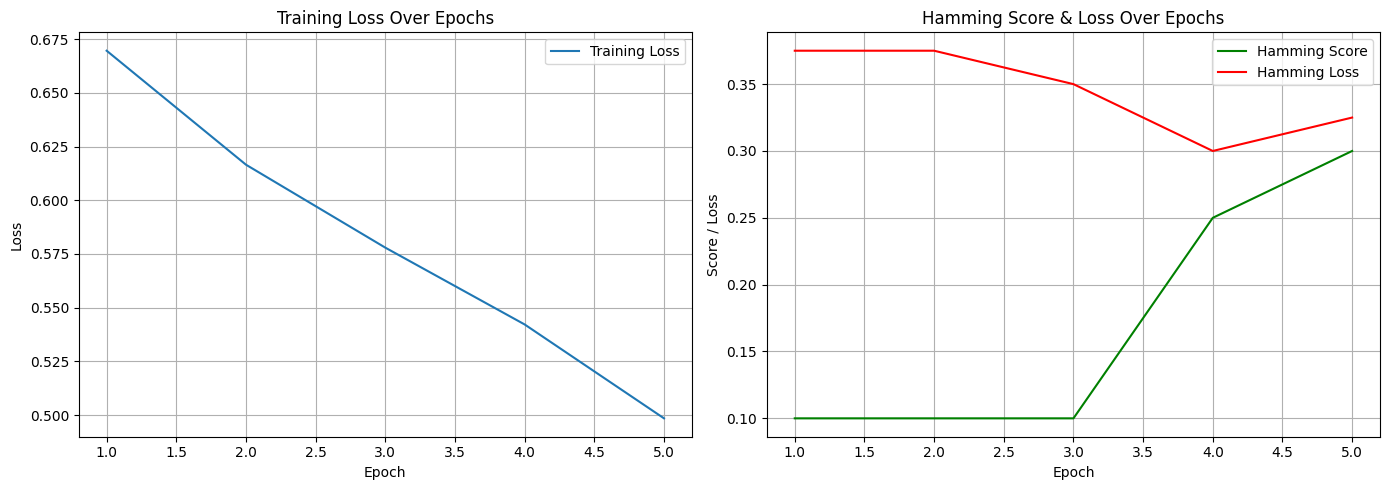

In [14]:
# === Imports ===
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import torch
from torch import cuda
from torch.utils.data import Dataset, DataLoader
from transformers import DistilBertTokenizer, DistilBertModel
import matplotlib.pyplot as plt
from sklearn import metrics
from tqdm import tqdm

# === Device Setup ===
device = 'cuda' if cuda.is_available() else 'cpu'

# === Hamming Score Function ===
def hamming_score(y_true, y_pred):
    acc_list = []
    for i in range(y_true.shape[0]):
        set_true = set(np.where(y_true[i])[0])
        set_pred = set(np.where(y_pred[i])[0])
        if len(set_true) == 0 and len(set_pred) == 0:
            acc_list.append(1)
        else:
            acc_list.append(len(set_true.intersection(set_pred)) / float(len(set_true.union(set_pred))))
    return np.mean(acc_list)

# === Data Loading ===
data = pd.read_csv("insurance_data.csv")
new_df = pd.DataFrame()
new_df['text'] = data['text']
new_df['labels'] = data.iloc[:, 1:].values.tolist()

# === Config ===
MAX_LEN = 256
TRAIN_BATCH_SIZE = 8
VALID_BATCH_SIZE = 8
EPOCHS = 5
LEARNING_RATE = 2e-5
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased', truncation=True, do_lower_case=True)

# === Dataset Class ===
class MultiLabelDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.text = dataframe.text
        self.targets = self.data.labels
        self.max_len = max_len

    def __len__(self):
        return len(self.text)

    def __getitem__(self, index):
        text = str(self.text[index])
        inputs = self.tokenizer.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_token_type_ids=True
        )
        return {
            'ids': torch.tensor(inputs['input_ids'], dtype=torch.long),
            'mask': torch.tensor(inputs['attention_mask'], dtype=torch.long),
            'token_type_ids': torch.tensor(inputs['token_type_ids'], dtype=torch.long),
            'targets': torch.tensor(self.targets[index], dtype=torch.float)
        }

# === Train-Test Split ===
train_data = new_df.sample(frac=0.8, random_state=42).reset_index(drop=True)
test_data = new_df.drop(train_data.index).reset_index(drop=True)

print(f"FULL Dataset: {new_df.shape}")
print(f"TRAIN Dataset: {train_data.shape}")
print(f"TEST Dataset: {test_data.shape}")

training_set = MultiLabelDataset(train_data, tokenizer, MAX_LEN)
testing_set = MultiLabelDataset(test_data, tokenizer, MAX_LEN)

train_params = {'batch_size': TRAIN_BATCH_SIZE, 'shuffle': True, 'num_workers': 0}
test_params = {'batch_size': VALID_BATCH_SIZE, 'shuffle': False, 'num_workers': 0}

training_loader = DataLoader(training_set, **train_params)
testing_loader = DataLoader(testing_set, **test_params)

# === Model ===
class DistilBERTClass(torch.nn.Module):
    def __init__(self):
        super(DistilBERTClass, self).__init__()
        self.l1 = DistilBertModel.from_pretrained("distilbert-base-uncased")
        self.pre_classifier = torch.nn.Linear(768, 768)
        self.dropout = torch.nn.Dropout(0.1)
        self.classifier = torch.nn.Linear(768, 4)  # 4 labels: claims, policy, fraud, coverage

    def forward(self, input_ids, attention_mask, token_type_ids):
        output = self.l1(input_ids=input_ids, attention_mask=attention_mask)
        hidden_state = output[0]
        pooled = hidden_state[:, 0]
        pooled = self.pre_classifier(pooled)
        pooled = torch.nn.Tanh()(pooled)
        pooled = self.dropout(pooled)
        output = self.classifier(pooled)
        return output

model = DistilBERTClass()
model.to(device)

# === Loss and Optimizer ===
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=LEARNING_RATE)

# === Training Function ===
train_losses = []

def train(epoch):
    model.train()
    total_loss = 0
    for step, data in tqdm(enumerate(training_loader), total=len(training_loader)):
        ids = data['ids'].to(device)
        mask = data['mask'].to(device)
        token_type_ids = data['token_type_ids'].to(device)
        targets = data['targets'].to(device)

        outputs = model(ids, mask, token_type_ids)
        loss = loss_fn(outputs, targets)
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(training_loader)
    train_losses.append(avg_loss)
    print(f"Epoch {epoch + 1}: Average Loss = {avg_loss:.4f}")

# === Validation Function ===
def validation(dataloader):
    model.eval()
    fin_outputs, fin_targets = [], []
    with torch.no_grad():
        for data in dataloader:
            ids = data['ids'].to(device)
            mask = data['mask'].to(device)
            token_type_ids = data['token_type_ids'].to(device)
            targets = data['targets'].to(device)

            outputs = model(ids, mask, token_type_ids)
            fin_targets.extend(targets.cpu().detach().numpy().tolist())
            fin_outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())
    return fin_outputs, fin_targets

# === Training Loop ===
hamming_scores = []
hamming_losses = []

for epoch in range(EPOCHS):
    train(epoch)
    outputs, targets = validation(testing_loader)
    final_outputs = (np.array(outputs) >= 0.5).astype(int)
    h_score = hamming_score(np.array(targets), final_outputs)
    h_loss = metrics.hamming_loss(targets, final_outputs)
    hamming_scores.append(h_score)
    hamming_losses.append(h_loss)
    print(f"Epoch {epoch + 1}: Hamming Score = {h_score:.4f}, Hamming Loss = {h_loss:.4f}")

# === Plot Metrics ===
epochs_range = range(1, EPOCHS + 1)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, hamming_scores, label='Hamming Score', color='green')
plt.plot(epochs_range, hamming_losses, label='Hamming Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Score / Loss')
plt.title('Hamming Score & Loss Over Epochs')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
